In [1]:
# set working directory
import os
os.getcwd()
cdir = 'C:\\Users\\AM254492\\Python-Data-Science-and-Machine-Learning-Bootcamp\\Python-Data-Science-and-Machine-Learning-Bootcamp\\Machine Learning Sections\\Logistic-Regression'
os.chdir(cdir)
os.getcwd()

'C:\\Users\\AM254492\\Python-Data-Science-and-Machine-Learning-Bootcamp\\Python-Data-Science-and-Machine-Learning-Bootcamp\\Machine Learning Sections\\Logistic-Regression'

In [2]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
#import Data
df = pd.read_csv('default_of_credit_card_clients.csv',header =1)

In [83]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'Outstanding'],
      dtype='object')

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


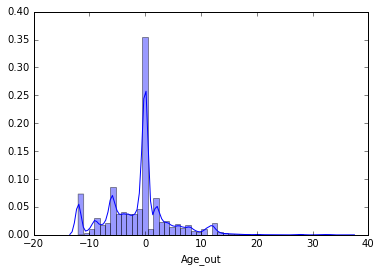

In [29]:
#Age of outstanding Analysis
#df['Age_out']=df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].sum()
df.columns
df['Age_out']=df['PAY_0']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6']
df['Age_out'].describe()
sns.distplot(df['Age_out'])

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


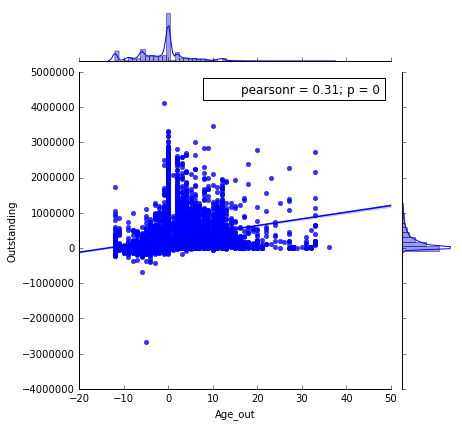

In [33]:
sns.jointplot(x='Age_out',y='Outstanding',data=df,kind = 'reg')
# ageing is somewhat impacting outstanding amount

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


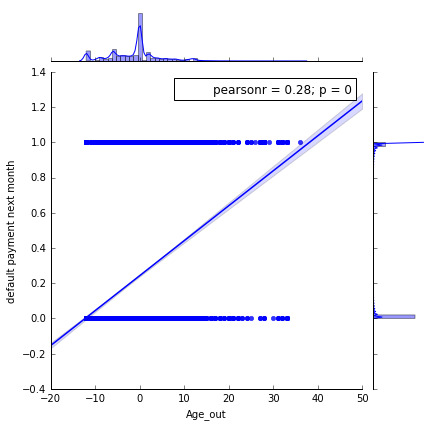

In [39]:
sns.jointplot(x='Age_out',y='default payment next month',data =df,kind='reg')

In [9]:
#question 2
n = (df['Outstanding'].max()-df['Outstanding'].min()) // 100000
bucket = pd.cut(df['Outstanding'],n)
bucket

0           (-37522.299, 63785.0746]
1           (-37522.299, 63785.0746]
2           (63785.0746, 165092.448]
3           (165092.448, 266399.821]
4           (-37522.299, 63785.0746]
5           (165092.448, 266399.821]
6        (2495162.0299, 2596469.403]
7           (-37522.299, 63785.0746]
8           (-37522.299, 63785.0746]
9           (-37522.299, 63785.0746]
10          (-37522.299, 63785.0746]
11          (-37522.299, 63785.0746]
12          (-37522.299, 63785.0746]
13          (266399.821, 367707.194]
14          (266399.821, 367707.194]
15          (165092.448, 266399.821]
16          (63785.0746, 165092.448]
17           (570321.94, 671629.313]
18          (-37522.299, 63785.0746]
19          (-37522.299, 63785.0746]
20          (63785.0746, 165092.448]
21          (-37522.299, 63785.0746]
22          (165092.448, 266399.821]
23          (-37522.299, 63785.0746]
24          (-37522.299, 63785.0746]
25          (165092.448, 266399.821]
26          (-37522.299, 63785.0746]
2

In [14]:
# To Perform Sql Analytics created Dataframe outstanding
#outstanding Amount Caculation
df['Sept_out'] = df['BILL_AMT1'] - df['PAY_AMT1']
df['Aug_out'] = df['BILL_AMT2'] - df['PAY_AMT2']
df['July_out'] = df['BILL_AMT3'] - df['PAY_AMT3']
df['June_out'] = df['BILL_AMT4'] - df['PAY_AMT4']
df['May_out'] = df['BILL_AMT5'] - df['PAY_AMT6']
df['April_out'] = df['BILL_AMT6'] - df['PAY_AMT6']
outstanding = df[['Sept_out','Aug_out','July_out','June_out','May_out','April_out']]
outstanding ['default_behaviour_nxt-pay'] = df['default payment next month']
outstanding['outstanding_amt'] = df['Outstanding']

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


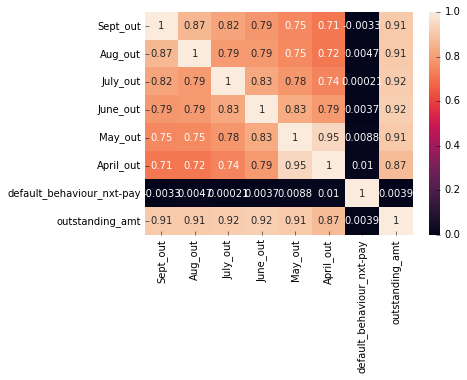

In [18]:
#Does outstanding ammount/trend affect default behaviours of next month
sns.heatmap(outstanding.corr(),annot=True)
#Default Behaviour do not have influence by outstanding amount or outstanding trend which 
#proved undrlying assumption of logistic regression

In [19]:
# To identify if there is any strong relation of outstanding amount with respect to 
#age,sex,education Variable
newdf=df[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','Outstanding','default payment next month']]

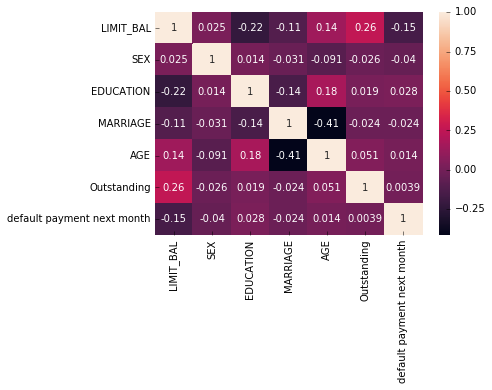

In [20]:
# Question4:By Looking to Heatmap its overruled that Age,Limit_Bal,Education have any 
#influence on total outstanding
sns.heatmap(newdf.corr(),annot=True)
#default payment is independent with SEX,EDUCATION,AGE,Marriage

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


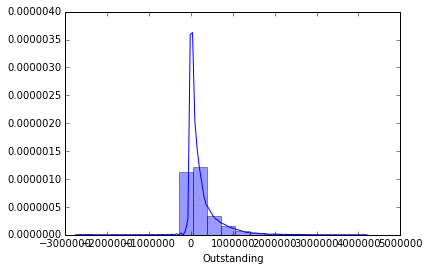

In [21]:
#question 1
sns.distplot(df['Outstanding'],bins = 20)

In [24]:
#Summing of all Monthly outstanding

Sum_out = outstanding.sum()
sum_out = pd.DataFrame(Sum_out)
sum_out['sum']=sum_out[0]
sum_out['Month']=sum_out.index
sum_out.drop(['default_behaviour_nxt-pay','outstanding_amt'],inplace=True)

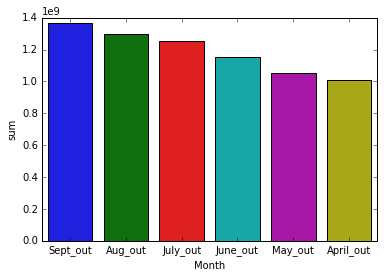

In [25]:
#Monthwise outstanding distribution
sns.barplot(x='Month',y='sum',data=sum_out)

In [26]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT6,default payment next month,Outstanding,Age_out,Sept_out,Aug_out,July_out,June_out,May_out,April_out
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,1,7015,-2,3913,2413,689,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2000,1,12077,3,2682,725,1682,2272,1455,1261
2,3,90000,2,2,2,34,0,0,0,0,...,5000,0,90635,0,27721,12527,12559,13331,9948,10549
3,4,50000,2,2,1,37,0,0,0,0,...,1000,0,222946,0,44990,46214,48091,27214,27959,28547
4,5,50000,1,2,1,57,-1,0,-1,0,...,679,0,50290,-2,6617,-31011,25835,11940,18467,18452
5,6,50000,1,1,2,37,0,0,0,0,...,800,0,230342,0,61900,55254,56951,18394,18819,19224
6,7,500000,1,1,2,29,0,0,0,0,...,13770,0,2543836,0,312965,372023,407007,522414,469233,460174
7,8,100000,2,2,2,23,0,-1,-1,0,...,1542,0,8695,-3,11496,-221,601,-360,-1701,-975
8,9,140000,2,3,1,28,0,0,2,0,...,1000,0,58451,2,7956,14096,11676,11211,10793,2719
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,12790,-10,0,0,0,-13007,13007,13912


In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT5,PAY_AMT6,default payment next month,Outstanding,Sept_out,Aug_out,July_out,June_out,May_out,April_out
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,3.000000e+04,3.000000e+04,30000.00000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,4799.387633,5215.502567,0.221200,2.382103e+05,45559.750400,4.325791e+04,4.178747e+04,38436.87210,35095.898400,33656.257833
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,15278.305679,17777.465775,0.415062,3.631651e+05,73173.789447,7.256594e+04,6.929536e+04,64200.61083,60476.648182,60151.290836
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,-2.671514e+06,-733744.000000,-1.702347e+06,-8.546410e+05,-667000.00000,-467556.000000,-684896.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,252.500000,117.750000,0.000000,4.520750e+03,745.000000,3.295000e+02,2.627500e+02,230.00000,0.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,1500.000000,1500.000000,0.000000,1.019230e+05,18550.500000,1.810250e+04,1.776900e+04,16970.00000,15263.000000,13926.500000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,4031.500000,4000.000000,0.000000,3.057178e+05,62241.500000,5.907775e+04,5.629425e+04,50259.50000,46930.750000,46067.250000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,426529.000000,528666.000000,1.000000,4.116080e+06,913727.000000,9.332080e+05,1.542258e+06,841586.00000,876915.000000,911408.000000


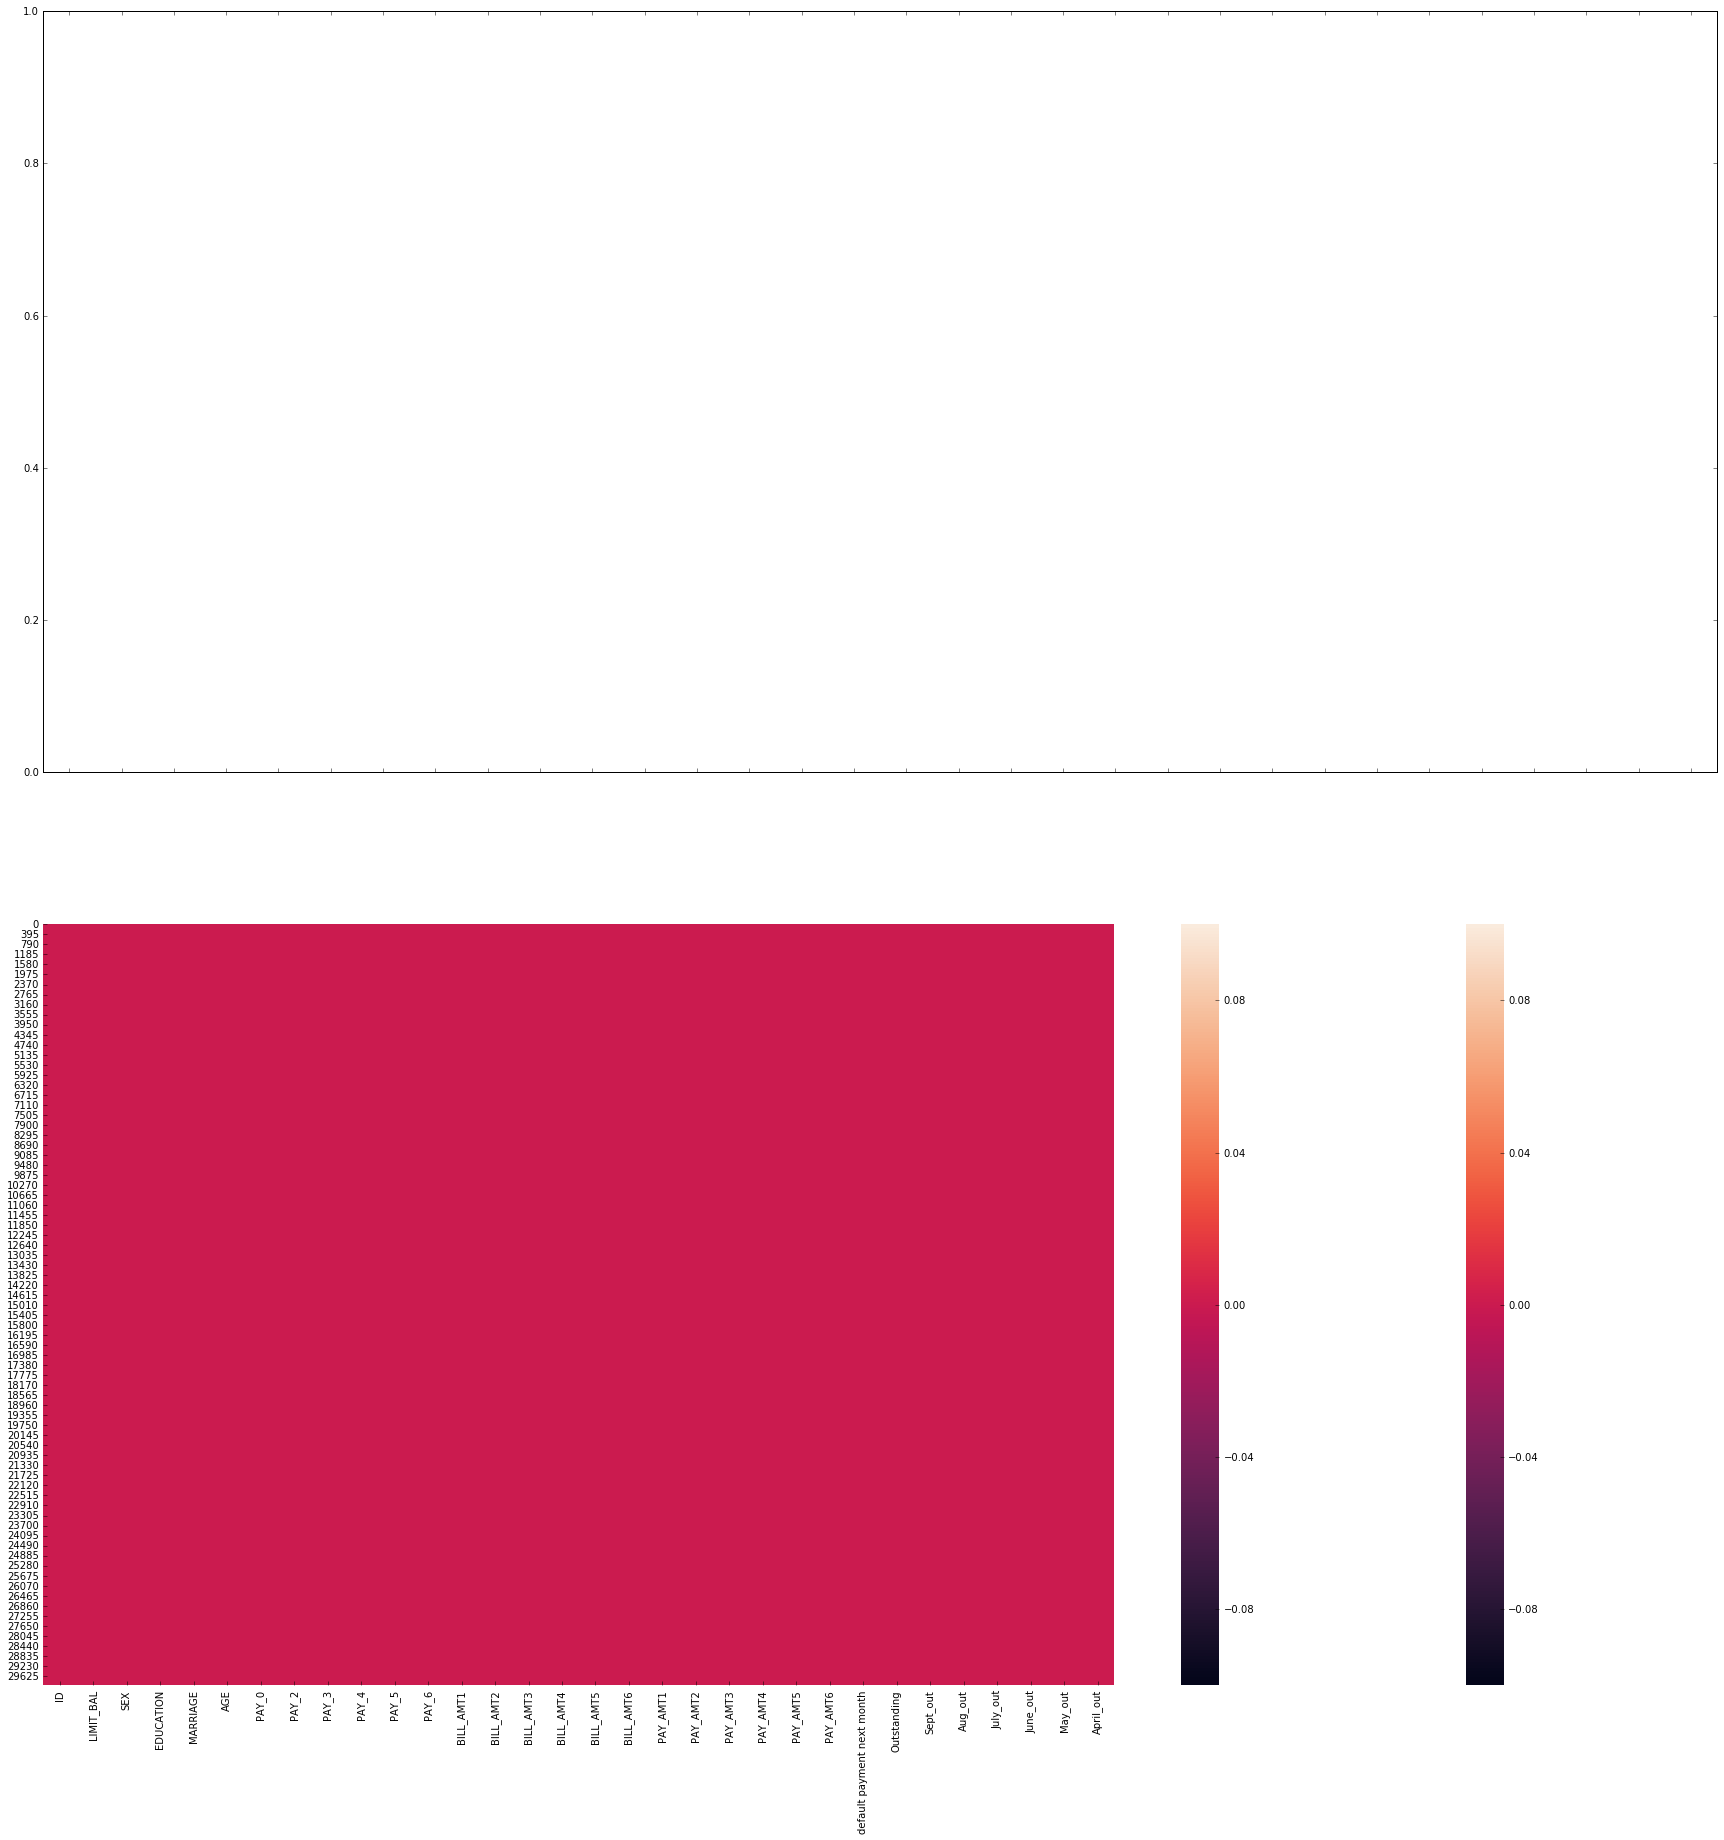

In [10]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize =(30,30),sharex=True)
ax1= sns.heatmap(df.isnull(),cbar='red')
ax2= sns.heatmap(df.isin(['NA','na']))

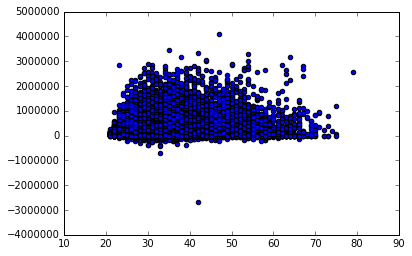

In [27]:
plt.scatter(x ="AGE",y = "Outstanding", data = df)

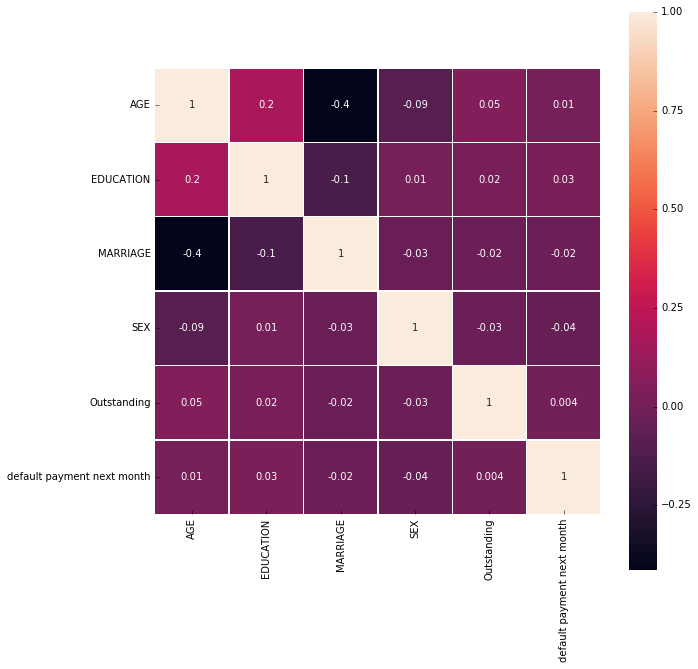

In [27]:
#Creating subset of df
sub_corr = df[['AGE','EDUCATION','MARRIAGE','SEX',
               'Outstanding','default payment next month']]
sub_corr.corr()
fig,ax = plt.subplots(figsize =(10,10))
sns.heatmap(sub_corr.corr(),annot=True,linewidth = 0.5,ax=ax,fmt = ".1g",cbar='Blue',square = True)

In [63]:
#To do Logistic modelling build new Dataframe
modeldf = df
modeldf

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT6,default payment next month,Outstanding,Age_out,Sept_out,Aug_out,July_out,June_out,May_out,April_out
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,1,7015,-2,3913,2413,689,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2000,1,12077,3,2682,725,1682,2272,1455,1261
2,90000,2,2,2,34,0,0,0,0,0,...,5000,0,90635,0,27721,12527,12559,13331,9948,10549
3,50000,2,2,1,37,0,0,0,0,0,...,1000,0,222946,0,44990,46214,48091,27214,27959,28547
4,50000,1,2,1,57,-1,0,-1,0,0,...,679,0,50290,-2,6617,-31011,25835,11940,18467,18452
5,50000,1,1,2,37,0,0,0,0,0,...,800,0,230342,0,61900,55254,56951,18394,18819,19224
6,500000,1,1,2,29,0,0,0,0,0,...,13770,0,2543836,0,312965,372023,407007,522414,469233,460174
7,100000,2,2,2,23,0,-1,-1,0,0,...,1542,0,8695,-3,11496,-221,601,-360,-1701,-975
8,140000,2,3,1,28,0,0,2,0,0,...,1000,0,58451,2,7956,14096,11676,11211,10793,2719
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,0,12790,-10,0,0,0,-13007,13007,13912


In [44]:
modeldf.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT6,default payment next month,Outstanding,Age_out,Sept_out,Aug_out,July_out,June_out,May_out,April_out
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,3.000000e+04,3.000000e+04,30000.00000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,5215.502567,0.221200,2.382103e+05,-1.094633,45559.750400,4.325791e+04,4.178747e+04,38436.87210,35095.898400,33656.257833
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,17777.465775,0.415062,3.631651e+05,5.893055,73173.789447,7.256594e+04,6.929536e+04,64200.61083,60476.648182,60151.290836
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,-2.671514e+06,-12.000000,-733744.000000,-1.702347e+06,-8.546410e+05,-667000.00000,-467556.000000,-684896.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,117.750000,0.000000,4.520750e+03,-5.000000,745.000000,3.295000e+02,2.627500e+02,230.00000,0.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,1500.000000,0.000000,1.019230e+05,0.000000,18550.500000,1.810250e+04,1.776900e+04,16970.00000,15263.000000,13926.500000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,4000.000000,0.000000,3.057178e+05,0.000000,62241.500000,5.907775e+04,5.629425e+04,50259.50000,46930.750000,46067.250000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,528666.000000,1.000000,4.116080e+06,36.000000,913727.000000,9.332080e+05,1.542258e+06,841586.00000,876915.000000,911408.000000


In [66]:
#Drop ID & outstanding
modeldf.drop(labels =['Outstanding'],axis =1,inplace=True)

In [73]:
modeldf.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT5,PAY_AMT6,default payment next month,Age_out,Sept_out,Aug_out,July_out,June_out,May_out,April_out
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,1,-2,3913,2413,689,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,0,2000,1,3,2682,725,1682,2272,1455,1261
2,90000,2,2,2,34,0,0,0,0,0,...,1000,5000,0,0,27721,12527,12559,13331,9948,10549
3,50000,2,2,1,37,0,0,0,0,0,...,1069,1000,0,0,44990,46214,48091,27214,27959,28547
4,50000,1,2,1,57,-1,0,-1,0,0,...,689,679,0,-2,6617,-31011,25835,11940,18467,18452


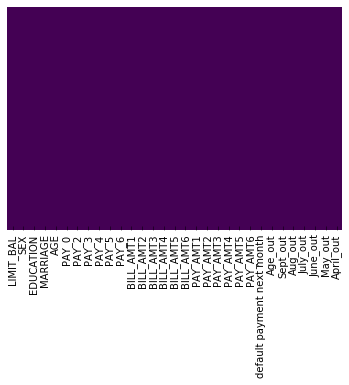

In [68]:
#now check any missing value in modeldf
sns.heatmap(modeldf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

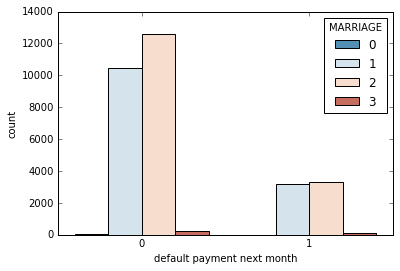

In [48]:
#sns.set_style('whitegrid')
#fig,(ax1,ax2) = plt.subplots(2,1,figsize =(10,15))
sns.countplot(x='default payment next month',data=modeldf,hue='MARRIAGE',palette='RdBu_r')

Check all Logistic Regression assumption
1. No Missing Values--We Ploted heatmap and found no missing values.
2. Predictant(default payment next month) has only two value which can see by plotting count plot.
3.All predictors(X Variable) are independent from each other which we have tested by plotting various Dataframe corelation

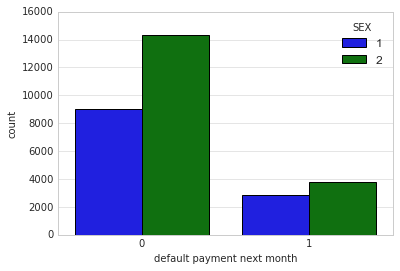

In [36]:
sns.countplot(x='default payment next month',data=modeldf,hue='SEX')

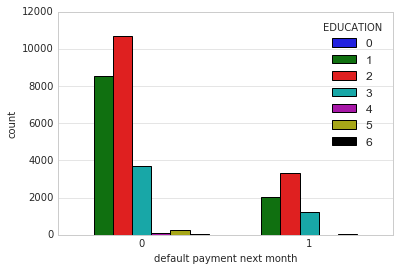

In [37]:
sns.countplot(x='default payment next month',data=modeldf,hue='EDUCATION')

In [50]:
#Train test Split
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale


In [89]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('default payment next month',axis=1), 
                                                    df['default payment next month'], test_size=0.30, 
                                                    random_state=101)

TRAINING & PREDICTING

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
logmodel.score(X_train,y_train)

0.77652380952380951

Logmodel Score is 77 % accurate which is good as it is inclined towards 1 more than 75

In [54]:
#now explore if you can improve accuracy

In [92]:
x_train = scale(X_train)

In [106]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
logmodel.score(x_train,y_train)

0.80928571428571427

In [107]:
#Now lests proceed with same accuracy and predict Y Variable for testing set
y_pred = logmodel.predict(X_test)

EVALUATION METRICS

In [108]:
from sklearn.metrics import classification_report

In [109]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.78      1.00      0.88      7058
          1       0.25      0.00      0.00      1942

avg / total       0.67      0.78      0.69      9000



In [98]:
# Testing 2nd Model by reomving all additional Coloums to see if it make any difference as we 
#found that Outstanding has strong coreration with Monthly outstanding hence will it make any diffrence 
#by removing those coloums
model1df=df
model1df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'Outstanding'],
      dtype='object')

In [99]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df.drop('default payment next month',axis=1), 
                                                    df['default payment next month'], test_size=0.30, 
                                                    random_state=101)

In [100]:
x1_train = scale(X1_train)

In [101]:
logmodel = LogisticRegression()
logmodel.fit(x1_train,y_train)
logmodel.score(x1_train,y_train)

0.80928571428571427

In [104]:
X1_test = scale(X1_test)
#Make Class prediction for testing set
y_pred = logmodel.predict(X1_test)

In [105]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.83      0.97      0.89      7058
          1       0.72      0.25      0.37      1942

avg / total       0.80      0.82      0.78      9000



GREAT JOB!! AMIT KUMAR SINGH!! FOR CREATING MODEL WITH 80% ACCURACY